# 워드 클라우드

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
!pip install Konlpy > /dev/null

In [2]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving gift.txt to gift.txt


In [3]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving heart.jpg to heart.jpg


## 한글 텍스트 전처리

In [4]:
with open(textfile) as fp:
    text = fp.read()

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [7]:
tokens = okt.nouns(text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [8]:
# 영문자, 숫자 제거
import re
new_tokens = []
for token in tokens:
    gift = re.sub('[A-Za-z0-9]', '', token)   
    if gift:
        new_tokens.append(gift)

In [9]:
# 한글 폰트 사용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

- 아래 두 과정을 반복해서 불용어 정리

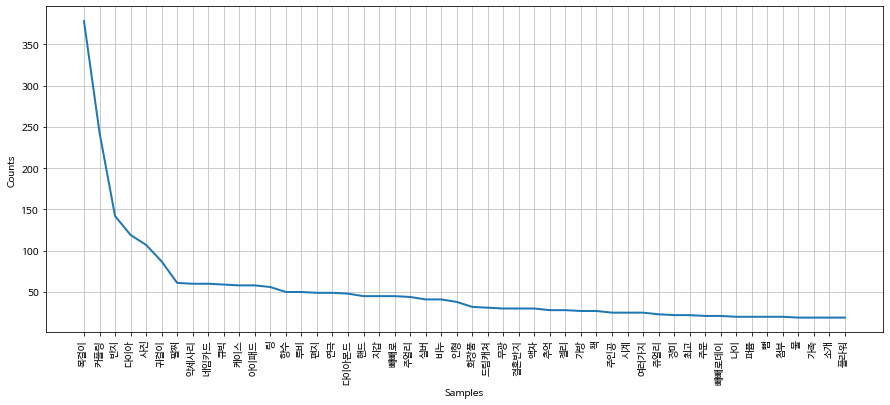

In [73]:
gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [72]:
stoptext = """선물 추천 것 가격 수 기능 제품 저 제 생각 여자 여자친구 사용 요 더 꽃 배송 구매 때 고급 해 
              판매 참고 머리 하나 한번 제작 용 준 디자인 거 네이버 사람 후기 중 감동 여친 하트 몇개 신지
              투척 클래식 정말 가능 사랑 세대 인기 브랜드 선택 모양 요즘 오늘 가지 남녀 그냥 위 페이 
              마감 그냥 곳 마음 부담 버핏 빅사 이즈 하프 커플 공용 체크 라인 로파 오늘 남자 협찬 전 헨드
              의미 도움 색상 아래 포장 처 조금 하루 정도 웨어 등 독서 심플 가장 때문 정보 스타일 소품
              티니 개 직접 향 로티 보시 처리 꽃말 보시 여성 밍티풀 주소 쇼핑 이니셜 기념일 헤어 질문
              이벤트 분 끈 인테리어 변경 링크 친구 아주 할인 미쁜 스 이면 남 지금 고민 센스 안쪽 모델
              아이템 사이트 여 미니 나 밴드 생일 답변 날 워터 꼭 미만 드라마 기념 유광 관심 말씀 워낙 
              크기 백화점 기간 레 벽 최고급 상자 온라인 기도 뺏다꼈다 주시 왕 눈 꾼 얼마나 문의 겸 성능
              다음 관람 단 컬 투맨 하바 컴포트핏 총 주기 일상 출처 이미지 실용 퀄리티 여기 도 보통 키 티
              평 우정 크로스 에어 또한 각인알 데 구성 이 저희 좀 검색 등등 정말 상품 자 및 결 뭐 준비 비
              평이 알 글 속 알 로 경우 스마트 쇼핑몰 말 걸 보고 메이드 가성 줄 라면 활용 사이 기억 사이
              착용 각인 가성 스토어 세트 건 손 데이트 일단 느낌 파트너 기분 활동 종류 화이트데이 통해
              세상 토닥토닥 평소 인치 연인 기분첨부 그 문구 화이트 가요 고객 프로 구 수수료 후드 마크 
              싱글 전문 엘 안 거나 피부 사이즈 케리 장난 더욱 블랙 확인 감 통해 안 아이유 조보아 자국
              싸구려 이용 단체 자주 스카이 항상 바구니 에니스 보드 추가 인터넷 채택 이번 알리 일리
              메세지 당일 보 닝 다른 를 베이비 셀제 전부 폰 할 자신 이건 이준명 뜰리 선호 은 시선
              현재 바로 유행 겨울 거기 향기 연어 곱창 감성 할 시 연예인 취향 크리스마스 남자친구 남친 
              남성 여성 블루투스 이이경 보기 이준영 시간 레온 또 피스 방향 역시 매장 이름 애플 명품
              님 디자이너 모두 레터 수도 실제 정성 제일 마스크 슈슈 핀
"""
stop_words = stoptext.split() 
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['반지', '목걸이', '가디건', '모자', '커플룩', '니트', '가디건', '가디건', '커플룩', '가디건']

## 워드 클라우드 그리기

In [30]:
from wordcloud import WordCloud
from PIL import Image

In [74]:
data = gift.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
        font_path=path, relative_scaling=0.2,
        background_color='white'
).generate_from_frequencies(dict(data))

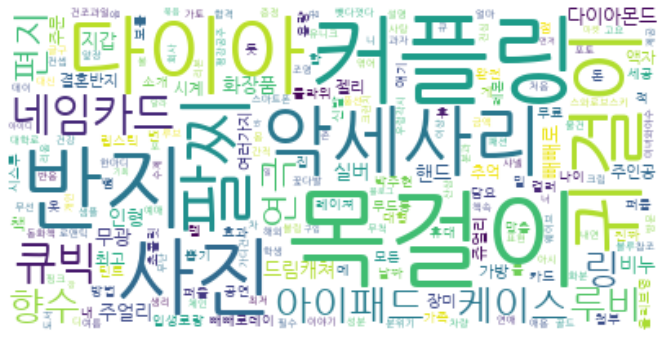

In [75]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 하트 그림에 표시

In [76]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [77]:
wc = WordCloud(
        font_path=path, relative_scaling=0.2,
        background_color='white', mask=mask,
        min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

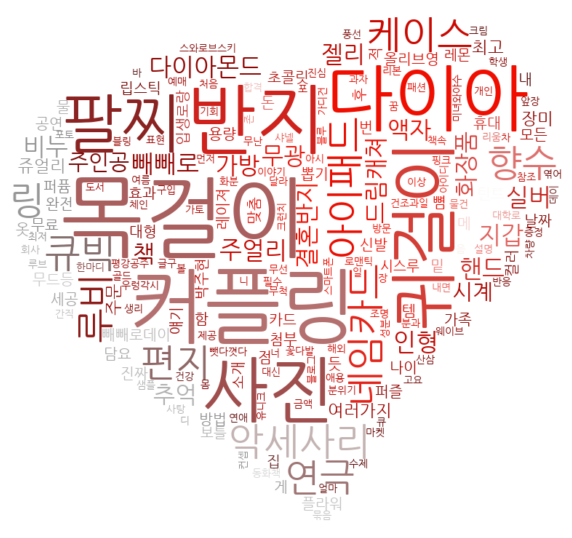

In [78]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()